# Task 1: Predict Restaurant Ratings

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_excel(r'C:\Users\hp\Downloads\Predict Restaurant Ratings.xlsx')
print(df)


      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [76]:
# Handle missing values
df.fillna(method='ffill', inplace=True)
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

C:\Users\hp\AppData\Local\Temp\ipykernel_14640\1720460601.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [77]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [78]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['cuisines', 'city']:
    df[col] = le.fit_transform(df[col])
print(df)


      restaurant_id           restaurant_name  country_code  city  \
0           6317637          Le Petit Souffle           162    73   
1           6304287          Izakaya Kikufuji           162    73   
2           6300002    Heat - Edsa Shangri-La           162    75   
3           6318506                      Ooma           162    75   
4           6314302               Sambo Kojin           162    75   
...             ...                       ...           ...   ...   
9546        5915730               Naml۱ Gurme           208   140   
9547        5908749              Ceviz A��ac۱           208   140   
9548        5915807                     Huqqa           208   140   
9549        5916112               A���k Kahve           208   140   
9550        5927402  Walter's Coffee Roastery           208   140   

                                                address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi.

In [80]:
# Features & target
X = df.drop('aggregate_rating', axis=1)
y = df['aggregate_rating']
print(X,y)


      restaurant_id           restaurant_name  country_code  city  \
0           6317637          Le Petit Souffle           162    73   
1           6304287          Izakaya Kikufuji           162    73   
2           6300002    Heat - Edsa Shangri-La           162    75   
3           6318506                      Ooma           162    75   
4           6314302               Sambo Kojin           162    75   
...             ...                       ...           ...   ...   
9546        5915730               Naml۱ Gurme           208   140   
9547        5908749              Ceviz A��ac۱           208   140   
9548        5915807                     Huqqa           208   140   
9549        5916112               A���k Kahve           208   140   
9550        5927402  Walter's Coffee Roastery           208   140   

                                                address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi.

In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)

      restaurant_id                           restaurant_name  country_code  \
1115           8417  World Cafe - Vibe by The LaLiT Traveller             1   
7633         301912                           Gabbar Chowmein             1   
8267       18424175                    Mittal Bikaneri Sweets             1   
7209       18418252               Bikaner Sweets & Restaurant             1   
6242           2958                  Chawla's Tandoori Xpress             1   
...             ...                                       ...           ...   
5734       18434072                                Dhaba NH10             1   
5191       18432219                         The Grill Kitchen             1   
5390       18168122               Kerala Kitchen & Restaurant             1   
860         3500505                           Barbeque Nation             1   
7270           2047                        Peshawari's Deluxe             1   

      city                                         

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

      restaurant_id                           restaurant_name  country_code  \
1115           8417  World Cafe - Vibe by The LaLiT Traveller             1   
7633         301912                           Gabbar Chowmein             1   
8267       18424175                    Mittal Bikaneri Sweets             1   
7209       18418252               Bikaner Sweets & Restaurant             1   
6242           2958                  Chawla's Tandoori Xpress             1   
...             ...                                       ...           ...   
5734       18434072                                Dhaba NH10             1   
5191       18432219                         The Grill Kitchen             1   
5390       18168122               Kerala Kitchen & Restaurant             1   
860         3500505                           Barbeque Nation             1   
7270           2047                        Peshawari's Deluxe             1   

      city                                         

In [83]:
print(X_train.dtypes)

restaurant_id             int64
restaurant_name          object
country_code              int64
city                      int64
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                  int64
average_cost_for_two      int64
currency                 object
has_table_booking        object
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu     object
price_range               int64
rating_color             object
rating_text              object
votes                     int64
dtype: object


In [84]:
X.select_dtypes(include='object').columns

Index(['restaurant_name', 'address', 'locality', 'locality_verbose',
       'currency', 'has_table_booking', 'has_online_delivery',
       'is_delivering_now', 'switch_to_order_menu', 'rating_color',
       'rating_text'],
      dtype='object')

In [91]:
#Drop all object (string) columns
X = X.select_dtypes(exclude='object')
print(X)


      restaurant_id  country_code  city   longitude   latitude  cuisines  \
0           6317637           162    73  121.027535  14.565443       920   
1           6304287           162    73  121.014101  14.553708      1111   
2           6300002           162    75  121.056831  14.581404      1671   
3           6318506           162    75  121.056475  14.585318      1126   
4           6314302           162    75  121.057508  14.584450      1122   
...             ...           ...   ...         ...        ...       ...   
9546        5915730           208   140   28.977392  41.022793      1813   
9547        5908749           208   140   29.041297  41.009847      1824   
9548        5915807           208   140   29.034640  41.055817      1110   
9549        5916112           208   140   29.036019  41.057979      1657   
9550        5927402           208   140   29.026016  40.984776       331   

      average_cost_for_two  price_range  votes  
0                     1100            

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model trained successfully!
MSE: 1.5554746815884801
R2 Score: 0.31660799715176136


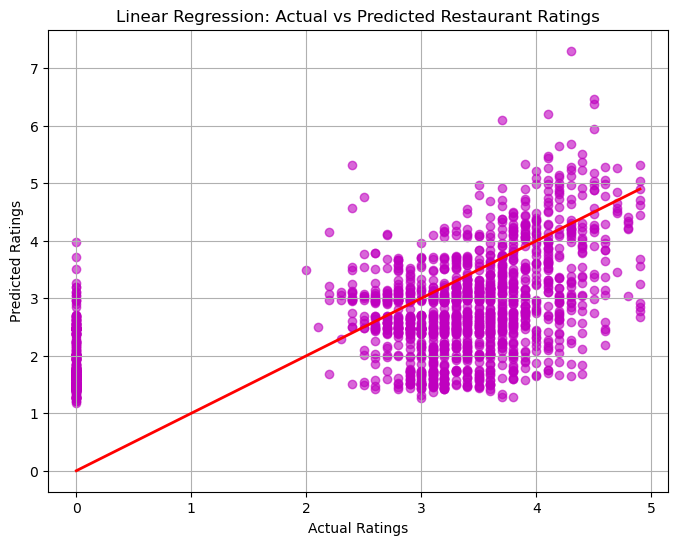

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='m', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2) 
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Linear Regression: Actual vs Predicted Restaurant Ratings")
plt.grid()
plt.show()


In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [95]:
df.fillna(method='ffill', inplace=True)
print(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_14640\751448968.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


      restaurant_id           restaurant_name  country_code  city  \
0           6317637          Le Petit Souffle           162    73   
1           6304287          Izakaya Kikufuji           162    73   
2           6300002    Heat - Edsa Shangri-La           162    75   
3           6318506                      Ooma           162    75   
4           6314302               Sambo Kojin           162    75   
...             ...                       ...           ...   ...   
9546        5915730               Naml۱ Gurme           208   140   
9547        5908749              Ceviz A��ac۱           208   140   
9548        5915807                     Huqqa           208   140   
9549        5916112               A���k Kahve           208   140   
9550        5927402  Walter's Coffee Roastery           208   140   

                                                address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi.

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Check if column exists before encoding
if 'cuisines' in df.columns:
    df['cuisines_enc'] = le.fit_transform(df['cuisines'])
    
if 'city' in df.columns:
    df['city_enc'] = le.fit_transform(df['city'])

print(df[['cuisines', 'cuisines_enc', 'city', 'city_enc']].head())


   cuisines  cuisines_enc  city  city_enc
0       920           920    73        73
1      1111          1111    73        73
2      1671          1671    75        75
3      1126          1126    75        75
4      1122          1122    75        75


In [105]:
print(df.columns)
df.rename(columns={'price range': 'price_range'}, inplace=True)
from sklearn.metrics.pairwise import cosine_similarity

features = df[['cuisine_enc', 'price_range']]
similarity = cosine_similarity(features)
def recommend_restaurants(cuisine, price_range, top_n=5):
    # Encode the user cuisine input
    if cuisine not in df['cuisines'].values:
        print(f"{cuisine} not found in dataset")
        return None
    
    cuisine_enc = le.transform([cuisine])[0]
    
    user_vector = [[cuisine_enc, price_range]]
    sim_scores = cosine_similarity(user_vector, features)[0]
    
    top_indices = sim_scores.argsort()[-top_n:][::-1]
    
    return df.iloc[top_indices][['cuisines', 'price_range', 'aggregate_rating']]
print(recommend_restaurants("North Indian", 2))



Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'cuisines_enc', 'city_enc', 'cuisine_enc'],
      dtype='object')
North Indian not found in dataset
None


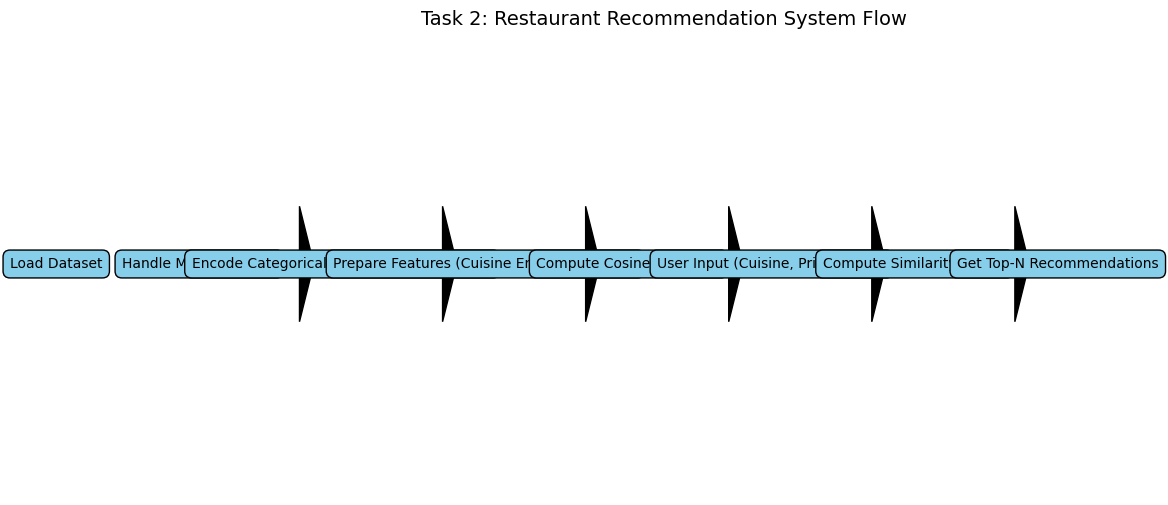

In [130]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12,6))
plt.axis('off')  # Hide axes

# Define the steps
steps = [
    "Load Dataset",
    "Handle Missing Values",
    "Encode Categorical Columns (Cuisine, City)",
    "Prepare Features (Cuisine Enc, Price Range)",
    "Compute Cosine Similarity",
    "User Input (Cuisine, Price Range)",
    "Compute Similarity Scores",
    "Get Top-N Recommendations"
]

# Define positions for boxes
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [1]*len(steps)

# Draw boxes
for i, step in enumerate(steps):
    plt.text(x[i], y[i], step, ha='center', va='center', fontsize=10,
             bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.5'))

# Draw arrows
for i in range(len(steps)-1):
    plt.arrow(x[i]+0.3, y[i], 0.4, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.title("Task 2: Restaurant Recommendation System Flow", fontsize=14)
plt.xlim(2.0, 8.5)
plt.ylim(0.8, 1.2)
plt.show()


In [133]:
# Task 3: Cuisine Classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [134]:
df.fillna(method='ffill', inplace=True)
print(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_14640\751448968.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


      restaurant_id           restaurant_name  country_code  city  \
0           6317637          Le Petit Souffle           162    73   
1           6304287          Izakaya Kikufuji           162    73   
2           6300002    Heat - Edsa Shangri-La           162    75   
3           6318506                      Ooma           162    75   
4           6314302               Sambo Kojin           162    75   
...             ...                       ...           ...   ...   
9546        5915730               Naml۱ Gurme           208   140   
9547        5908749              Ceviz A��ac۱           208   140   
9548        5915807                     Huqqa           208   140   
9549        5916112               A���k Kahve           208   140   
9550        5927402  Walter's Coffee Roastery           208   140   

                                                address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi.